# A Data-Driven Analysis of the Marketing Executive Position in the Labour Market

## Table of content
### 1. Context
### 2. Import Libraries
### 3. Data Understanding
### 4. Data Preparation
### 5. Exploratory Data Analysis (EDA)
### 6. Modeling
### 7. Conclusion

### Context
as Data Analyst, you are tasked to analyze the job position.
The company proposed a plan to identify the job responsibilities and tasks, then transform them into gig jobs. Keep in mind that not all of the reponsibilities are viable to be a gig job. To compensate for the job, you also need to identify the fair salary range for the job position according to its experience level and country

#### Target
Facing this challenge, you are required to:

* Discover the fair salary range
* List out possible gigs from the job
* Present your finding.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

In [3]:
# import dataset
path_category = 'job_category.csv'
path_location = 'job_location.csv'
path_main = 'job_main.csv'
path_requirement ='job_req_edu.csv'
path_type = 'job_type.csv'
path_responsible = 'responsibilities.csv'

# Read CSV files into Pandas DataFrames
df_category = pd.read_csv(path_category)
df_location = pd.read_csv(path_location)
df_main = pd.read_csv(path_main)
df_requirement = pd.read_csv(path_requirement)
df_type = pd.read_csv(path_type)
df_responsible = pd.read_csv(path_responsible)

In [4]:
df_category.head()

,scrapedid,category
0,911238,sales/marketing
1,911238,digital marketing
2,6844,sales/marketing
3,6844,sales - financial services
4,334158,marketing executive


In [5]:
df_location.head()

,scrapedid,location
0,776736,klang/port klang
1,180838,"selayang, selangor"
2,911238,kuala lumpur
3,2910070,petaling jaya
4,6844,kuala lumpur


In [6]:
df_requirement.head()

,scrapedid,requirement
0,776736,diploma
1,776736,professional degree
2,776736,post graduate diploma
3,776736,bachelor's degree
4,776736,advanced/higher/graduate diploma


In [7]:
df_type.head()

,scrapedid,type
0,2656811,full-time
1,911238,full-time
2,4273934,full time
3,6844,full-time
4,4140110,full time


In [10]:
df_responsible.head()

,scrapedid,responsibility
0,0,Design and influence a PR strategy and SMART P...
1,1,Ensure consistent and relevant customer commun...
2,2,"Research, write press releases and ensure that..."
3,3,Maintain relationships with influential lifest...
4,4,Manage photo shoots within the hotel for fashi...


In [11]:
# change the name of the responsible column
df_responsible = df_responsible.rename(columns={'Unnamed: 0': 'scrapedid'}) 

In [12]:
# Executing SQL in Colab
from sqlite3 import connect
conn = connect(':memory:')
df_category.to_sql('job_category',conn, index=False, if_exists='replace')
df_location.to_sql('job_location',conn, index=False, if_exists='replace')
df_main.to_sql('job_main',conn, index=False, if_exists='replace')
df_requirement.to_sql('job_requirement',conn, index=False, if_exists='replace')
df_type.to_sql('job_type',conn, index=False, if_exists='replace')
df_responsible.to_sql('job_responsible',conn, index=False, if_exists='replace')

1825

In [13]:
# SQL query to combine data
df = pd.read_sql("""
SELECT
    m.*,
    c.category,
    l.location,
    r.requirement,
    t.type,
    res.responsibility
FROM job_main m
LEFT JOIN job_category c ON c.scrapedid = m.scrapedid
LEFT JOIN job_location l ON l.scrapedid = m.scrapedid
LEFT JOIN job_requirement r ON r.scrapedid = m.scrapedid
LEFT JOIN job_type t ON t.scrapedid = m.scrapedid
LEFT JOIN job_responsible res ON res.scrapedid = m.scrapedid
""", conn)

In [14]:
df.shape

(288266, 21)

In [15]:
df.head()

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,year_experience_max,currency,...,salary_max,remote,source,last_seen,date_expired,category,location,requirement,type,responsibility
0,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,NaN,NaN,SGD,...,NaN,NaN,None,2022-03-29 08:59:56.687006,None,arts/creative design,central,not specified,full-time,Manage the arrangements for special events suc...
1,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,NaN,NaN,SGD,...,NaN,NaN,None,2022-03-29 08:59:56.687006,None,arts/media/communications,central,not specified,full-time,Manage the arrangements for special events suc...
2,17,1,17.0,2022-03-29 08:59:56.687006,Credit Control Executive / Regional,2022-02-27 16:00:00.000000,Junior Executive,3.0,NaN,SGD,...,NaN,NaN,None,2022-03-29 08:59:56.687006,None,admin/human resources,singapore,advanced/higher/graduate diploma,full-time,Cooperate and work closely with leaders on pub...
3,17,1,17.0,2022-03-29 08:59:56.687006,Credit Control Executive / Regional,2022-02-27 16:00:00.000000,Junior Executive,3.0,NaN,SGD,...,NaN,NaN,None,2022-03-29 08:59:56.687006,None,admin/human resources,singapore,bachelor's degree,full-time,Cooperate and work closely with leaders on pub...
4,17,1,17.0,2022-03-29 08:59:56.687006,Credit Control Executive / Regional,2022-02-27 16:00:00.000000,Junior Executive,3.0,NaN,SGD,...,NaN,NaN,None,2022-03-29 08:59:56.687006,None,admin/human resources,singapore,diploma,full-time,Cooperate and work closely with leaders on pub...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288266 entries, 0 to 288265
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   scrapedid            288266 non-null  int64  
 1   webid                288266 non-null  int64  
 2   companyid            288253 non-null  float64
 3   date_scraped         288266 non-null  object 
 4   job_title            288266 non-null  object 
 5   date_posted          288266 non-null  object 
 6   career_level         240891 non-null  object 
 7   year_experience_min  187615 non-null  float64
 8   year_experience_max  747 non-null     float64
 9   currency             285457 non-null  object 
 10  salary_min           161340 non-null  float64
 11  salary_max           161453 non-null  float64
 12  remote               16016 non-null   float64
 13  source               0 non-null       object 
 14  last_seen            288266 non-null  object 
 15  date_expired     

In [17]:
df.describe()

,scrapedid,webid,companyid,year_experience_min,year_experience_max,salary_min,salary_max,remote
count,2.882660e+05,288266.000000,288253.000000,187615.000000,747.000000,1.613400e+05,1.614530e+05,16016.000000
mean,1.626007e+06,3.428687,88363.412818,2.211454,4.053548,2.567494e+05,3.771614e+05,0.073239
std,1.402807e+06,4.500106,117444.193987,1.462781,7.421967,1.339377e+06,1.954919e+06,0.260537
min,1.600000e+01,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.978390e+05,1.000000,5356.000000,1.000000,1.000000,2.500000e+03,3.500000e+03,0.000000
50%,1.418914e+06,2.000000,34151.000000,2.000000,3.000000,3.000000e+03,4.000000e+03,0.000000
75%,2.880047e+06,4.000000,136021.000000,3.000000,3.000000,3.500000e+03,5.000000e+03,0.000000
max,4.386010e+06,26.000000,494910.000000,20.000000,50.000000,1.700000e+08,2.000000e+08,1.000000


### Data Preparation

In [18]:
# Check duplicated
df.duplicated().sum()

0

In [22]:
# Check missing values
df.isnull().sum()

scrapedid                   0
webid                       0
companyid                  13
date_scraped                0
job_title                   0
date_posted                 0
career_level            47375
year_experience_min    100651
year_experience_max    287519
currency                 2809
salary_min             126926
salary_max             126813
remote                 272250
source                 288266
last_seen                   0
date_expired           288266
category                  175
location                    0
requirement             44590
type                     3649
responsibility         287111
dtype: int64

We have found many missing values, so the next step is to carry out imputation because the large number of missing values ​​is worried that the model will perform poorly

In [19]:
# Delete the last seen columns
df.drop(columns=['last_seen'], inplace=True)

In [22]:
# Convert 'date_scraped' and 'date_expired' column to datetime
df['date_scraped'] = pd.to_datetime(df['date_scraped'])
df['date_expired'] = pd.to_datetime(df['date_expired'])
df.head()

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,year_experience_max,currency,salary_min,salary_max,remote,source,date_expired,category,location,requirement,type,responsibility
0,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,NaN,NaN,SGD,NaN,NaN,NaN,None,NaT,arts/creative design,central,not specified,full-time,Manage the arrangements for special events suc...
1,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,NaN,NaN,SGD,NaN,NaN,NaN,None,NaT,arts/media/communications,central,not specified,full-time,Manage the arrangements for special events suc...
2,17,1,17.0,2022-03-29 08:59:56.687006,Credit Control Executive / Regional,2022-02-27 16:00:00.000000,Junior Executive,3.0,NaN,SGD,NaN,NaN,NaN,None,NaT,admin/human resources,singapore,advanced/higher/graduate diploma,full-time,Cooperate and work closely with leaders on pub...
3,17,1,17.0,2022-03-29 08:59:56.687006,Credit Control Executive / Regional,2022-02-27 16:00:00.000000,Junior Executive,3.0,NaN,SGD,NaN,NaN,NaN,None,NaT,admin/human resources,singapore,bachelor's degree,full-time,Cooperate and work closely with leaders on pub...
4,17,1,17.0,2022-03-29 08:59:56.687006,Credit Control Executive / Regional,2022-02-27 16:00:00.000000,Junior Executive,3.0,NaN,SGD,NaN,NaN,NaN,None,NaT,admin/human resources,singapore,diploma,full-time,Cooperate and work closely with leaders on pub...


In [23]:
# Check the source columns
unique_sources = df['source'].unique()
print(unique_sources)

[None]


Because the Source column is empty, it's better if we just delete it

In [24]:
# Delete source columns
df = df.drop(columns=['source'])

In [25]:
# check remote jobs
df['remote'].dropna().value_counts()

remote
0.0    14843
1.0     1173
Name: count, dtype: int64

* 0 indicates that the job does not offer remote,* 
1 shows that the job offers remote

##### For 'requirement', 'type', 'responsibility', 'career level', and 'category' columns, i will impute values according with the job title


In [26]:
import re

# Function to check if there are emojis in text using regular expressions
def has_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" # symbols & pictographs
                               u"\U0001F680-\U0001F6FF" # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                               u"\U00002500-\U00002BEF" #chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f" #dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# filter rows related to Marketing Executive
df1 = df[df['job_title'].str.contains('Marketing Executive', case=False) & ~df['job_title'].apply(has_emoji)]

In [27]:
# requirement column
for row in df1.iterrows():
    if pd.isna(row[1]['requirement']):

      job_title = row[1]['job_title']
      scrapedid = row[1]['scrapedid']

      value = df1.loc[df1.job_title == job_title, 'job_title'].value_counts().index[0]
      df1.loc[df1.scrapedid == scrapedid, 'job_title'] = value      

In [28]:
# type column
for row in df1.iterrows():
    if pd.isna(row[1]['type']):

      job_title = row[1]['job_title']
      scrapedid = row[1]['scrapedid']

      value = df1.loc[df1.job_title == job_title, 'job_title'].value_counts().index[0]
      df1.loc[df1.scrapedid == scrapedid, 'job_title'] = value  

In [29]:
# responsibility column
for row in df1.iterrows():
    if pd.isna(row[1]['responsibility']):

      job_title = row[1]['job_title']
      scrapedid = row[1]['scrapedid']

      value = df1.loc[df1.job_title == job_title, 'job_title'].value_counts().index[0]
      df1.loc[df1.scrapedid == scrapedid, 'job_title'] = value  

In [30]:
# career level column
for row in df1.iterrows():
    if pd.isna(row[1]['career_level']):

      job_title = row[1]['job_title']
      scrapedid = row[1]['scrapedid']

      value = df1.loc[df1.job_title == job_title, 'job_title'].value_counts().index[0]
      df1.loc[df1.scrapedid == scrapedid, 'job_title'] = value  

In [31]:
# category column
for row in df1.iterrows():
    if pd.isna(row[1]['category']):

      job_title = row[1]['job_title']
      scrapedid = row[1]['scrapedid']

      value = df1.loc[df1.job_title == job_title, 'job_title'].value_counts().index[0]
      df1.loc[df1.scrapedid == scrapedid, 'job_title'] = value  

In [32]:
# remote column
for row in df1.iterrows():
    if pd.isna(row[1]['remote']):

      job_title = row[1]['job_title']
      scrapedid = row[1]['scrapedid']

      value = df1.loc[df1.job_title == job_title, 'job_title'].value_counts().index[0]
      df1.loc[df1.scrapedid == scrapedid, 'job_title'] = value  

##### Checking values in selected column
###### Examine values in certain columns, such as:
    1. Career Level
    2. Requirement
    3. Type.
###### The purpose of this step is to identify values that may need to be replaced with more appropriate and standardized terms.

In [243]:
# Career level
df1['career_level'].value_counts()

career_level
Junior Executive                           76023
Senior Executive                           28952
Not Specified                              18687
Entry Level                                12019
Staff (non-management & non-supervisor)    11706
Supervisor/Coordinator                      1360
Non-Executive                                787
Less than 1 year experience                  634
Manager                                      614
Manager/Assistant Manager                    338
Executive                                    169
Senior Manager                                68
CEO/GM/Director/Senior Manager                12
Entry Level / Junior, Apprentice               7
Staff                                          5
property development & consultancy             4
digital, online & social media                 4
Associate / Supervisor                         4
crm                                            2
product marketing                              2
Mid-Sen

In [42]:
# Requirement
df1['requirement'].value_counts()

requirement
not specified                                                                                                                                      26432
bachelor's degree                                                                                                                                  23983
diploma                                                                                                                                            21719
post graduate diploma                                                                                                                              20503
professional degree                                                                                                                                20503
                                                                                                                                                   ...  
diploma /degree holder                                                

In [244]:
# Employment type
df1['type'].value_counts()

type
Full Time          175858
Contract             5076
Internship           1083
Part Time             997
Temporary             221
freelance               6
casual/vacation         6
mitra                   3
Apprenticeship          3
Self-employed           2
Name: count, dtype: int64

In [245]:
# Rename values based on type
df1.loc[:, 'type'] = df1['type'].replace({'full-time': 'Full Time',
                                          'full time': 'Full Time',
                                          'full_time': 'Full Time',
                                          'full_time, permanent': 'Full Time',
                                          'full timeinternship': 'Full Time',
                                          'full-time, permanent': 'Full Time',
                                          'karyawan tetap': 'Full Time',
                                          'permanent': 'Full Time',
                                          'Permanent': 'Full Time',
                                          'full timepart time': 'Full Time',
                                          'contract': 'Contract',
                                          'contract/temp': 'Contract',
                                          'contractor': 'Contract',
                                          'contractual': 'Contract',
                                          'karyawan kontrak': 'Contract',
                                          'internship': 'Internship',
                                          'intern': 'Internship',
                                          'part-time': 'Part Time',
                                          'part time': 'Part Time',
                                          'Part-time': 'Part Time',
                                          'part_time': 'Part Time',
                                          'part_time': 'Part Time',
                                          'temporary': 'Temporary',})

##### Imputing the median to the null values in the 'year_experience_min', 'year_experience_max' columns

In [248]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(df1[['year_experience_min', 'year_experience_max']])
df1.loc[:, ['year_experience_min', 'year_experience_max']] = imputer.transform(df1[['year_experience_min', 'year_experience_max']])

##### Imputing the median to the null values in the 'salary_min', 'salary_max' columns

In [249]:
imputer = SimpleImputer(strategy='median')

imputer.fit(df1[['salary_min', 'salary_max']])
df1.loc[:, ['salary_min', 'salary_max']] = imputer.transform(df1[['salary_min', 'salary_max']])

In [250]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184956 entries, 0 to 288265
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   scrapedid            184956 non-null  int64         
 1   webid                184956 non-null  int64         
 2   companyid            184956 non-null  float64       
 3   date_scraped         184956 non-null  datetime64[ns]
 4   job_title            184956 non-null  object        
 5   date_posted          184956 non-null  object        
 6   career_level         151409 non-null  object        
 7   year_experience_min  184956 non-null  float64       
 8   year_experience_max  184956 non-null  float64       
 9   currency             183513 non-null  object        
 10  salary_min           184956 non-null  float64       
 11  salary_max           184956 non-null  float64       
 12  remote               13531 non-null   float64       
 13  category           

##### Most of the values ​​in this table have been lost because we only want to look at jobs related to Marketing Executives

### Exploratory Data Analysis (EDA)

In [251]:
df1.head()

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,year_experience_max,currency,salary_min,salary_max,remote,category,location,requirement,type,responsibility,MYR
0,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,2.0,3.0,SGD,3000.0,4000.0,NaN,arts/creative design,central,not specified,Full Time,Manage the arrangements for special events suc...,984.0
1,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,2.0,3.0,SGD,3000.0,4000.0,NaN,arts/media/communications,central,not specified,Full Time,Manage the arrangements for special events suc...,984.0
50,159,2,161.0,2022-03-29 09:00:03.610569,Marketing Executive (KL),2022-03-23 19:30:53.000000,Junior Executive,2.0,3.0,MYR,3000.0,4000.0,NaN,marketing/business dev,selangor,bachelor's degree,Full Time,Must have SIM C/A (driving license),3000.0
51,159,2,161.0,2022-03-29 09:00:03.610569,Marketing Executive (KL),2022-03-23 19:30:53.000000,Junior Executive,2.0,3.0,MYR,3000.0,4000.0,NaN,marketing/business dev,selangor,post graduate diploma,Full Time,Must have SIM C/A (driving license),3000.0
52,159,2,161.0,2022-03-29 09:00:03.610569,Marketing Executive (KL),2022-03-23 19:30:53.000000,Junior Executive,2.0,3.0,MYR,3000.0,4000.0,NaN,marketing/business dev,selangor,professional degree,Full Time,Must have SIM C/A (driving license),3000.0


In [105]:
# Filter jobs related to remote work
remote_jobs = df1[df1['remote'] == True]['job_title']

print(remote_jobs)

8767      SEO Marketing executive - Remote
12341       Influencer Marketing Executive
18650          Digital Marketing Executive
22412                  Marketing Executive
22430          Digital Marketing Executive
                        ...               
287934         Digital Marketing Executive
287935         Digital Marketing Executive
287936         Digital Marketing Executive
287937         Digital Marketing Executive
287938         Digital Marketing Executive
Name: job_title, Length: 945, dtype: object


##### From here we can find out what jobs can be done online

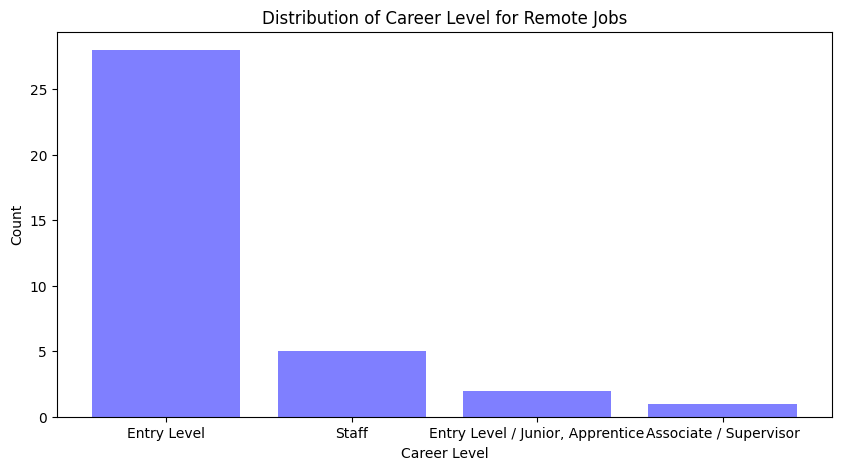

In [159]:
# Distribution career level to find out remote jobs

# Plot distribution of values ​​based on career level for remote jobs
plt.figure(figsize=(10, 5)) # Determines the size of the plot
plt.bar(remote_jobs['career_level'].value_counts().index, remote_jobs['career_level'].value_counts(), color='blue', alpha=0.5)
plt.xlabel('Career Level')
plt.ylabel('Count')
plt.title('Distribution of Career Level for Remote Jobs')
plt.show()


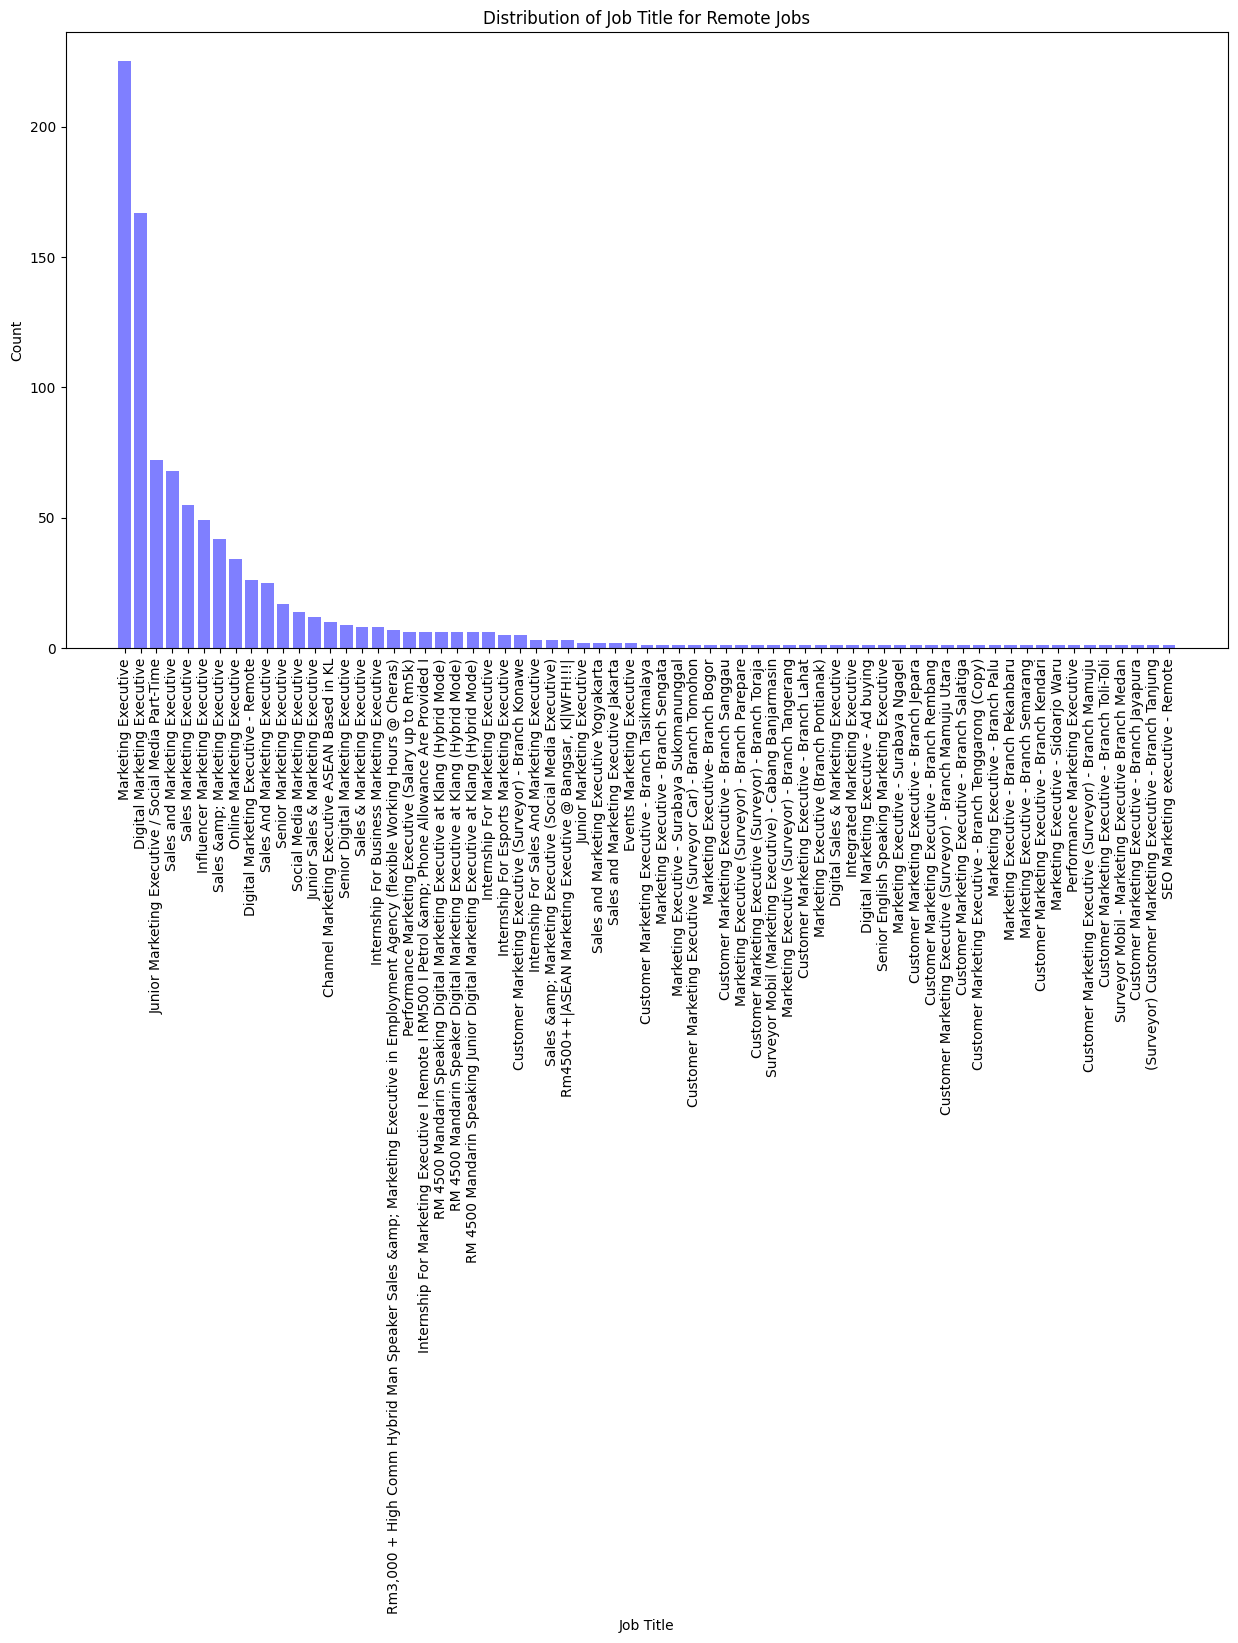

In [160]:
# Distribution job title to find out remote jobs

# Plot distribution of values ​​by job type for remote jobs
plt.figure(figsize=(15, 8))
plt.bar(remote_jobs['job_title'].value_counts().index, remote_jobs['job_title'].value_counts(), color='blue', alpha=0.5)
plt.xticks(rotation=90) 
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Title for Remote Jobs')
plt.show()


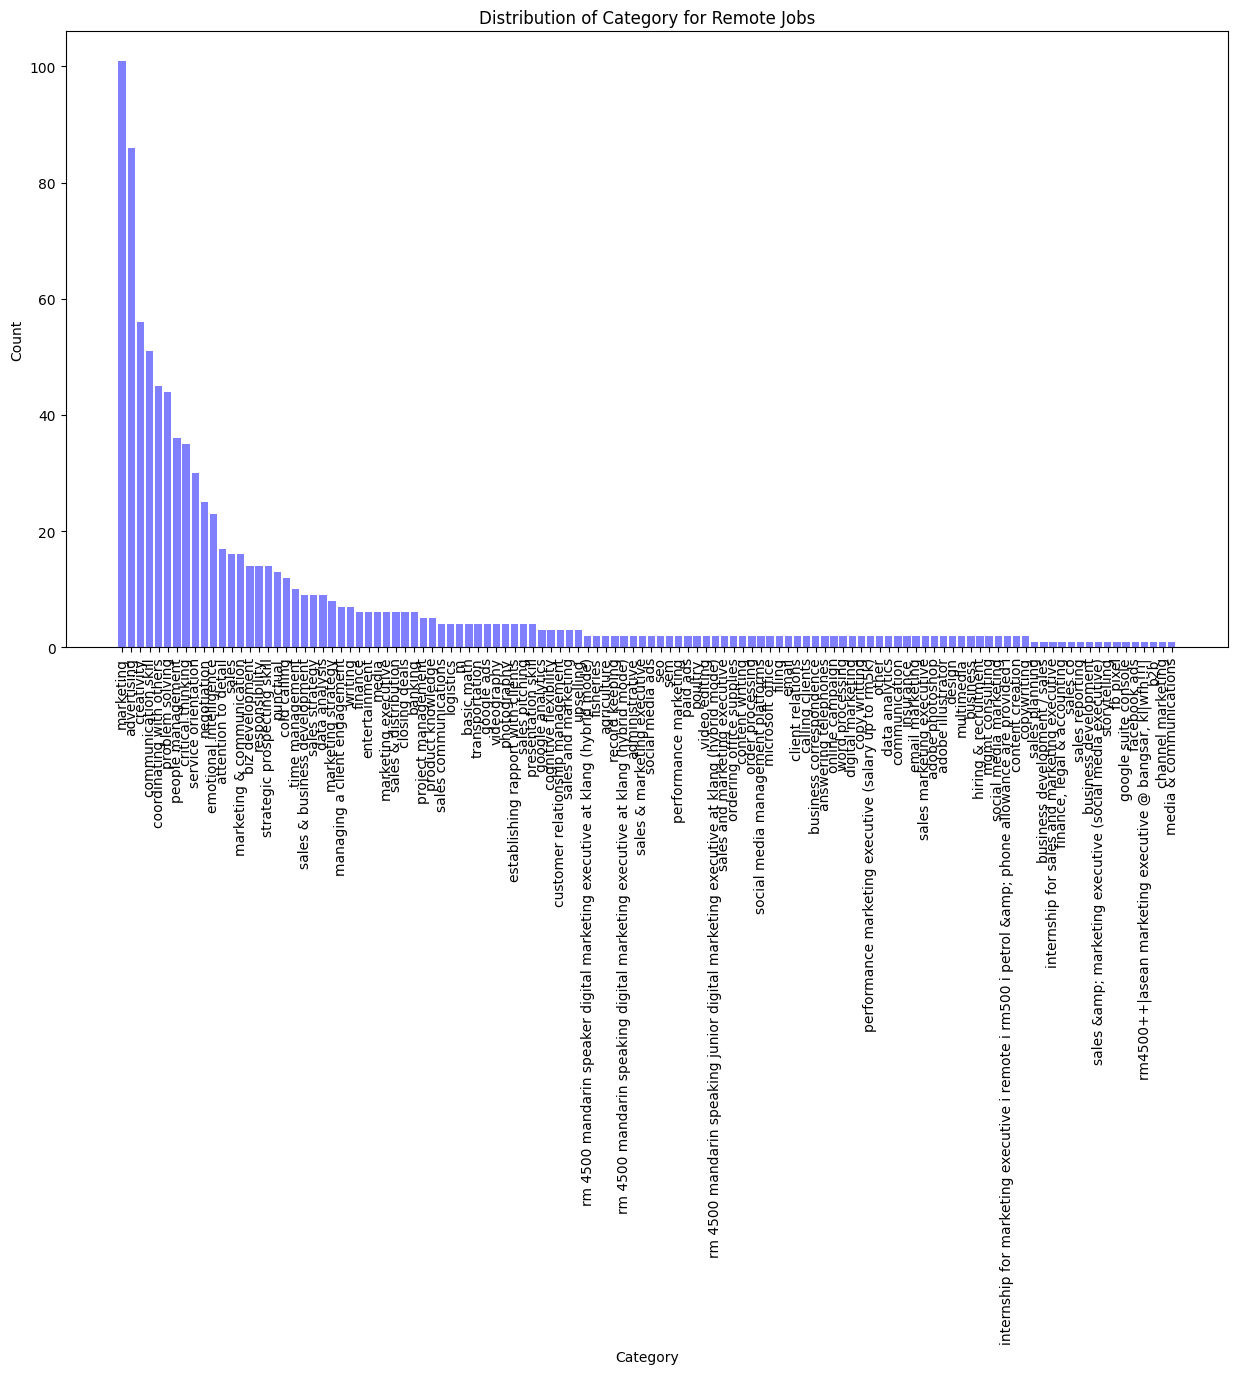

In [221]:
# Distribution category to find out non remote jobs

# Plot distribution of values ​​by job type for non remote jobs
plt.figure(figsize=(15, 8))
plt.bar(remote_jobs['category'].value_counts().index, remote_jobs['category'].value_counts(), color='blue', alpha=0.5)
plt.xticks(rotation=90) 
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Category for Remote Jobs')
plt.show()


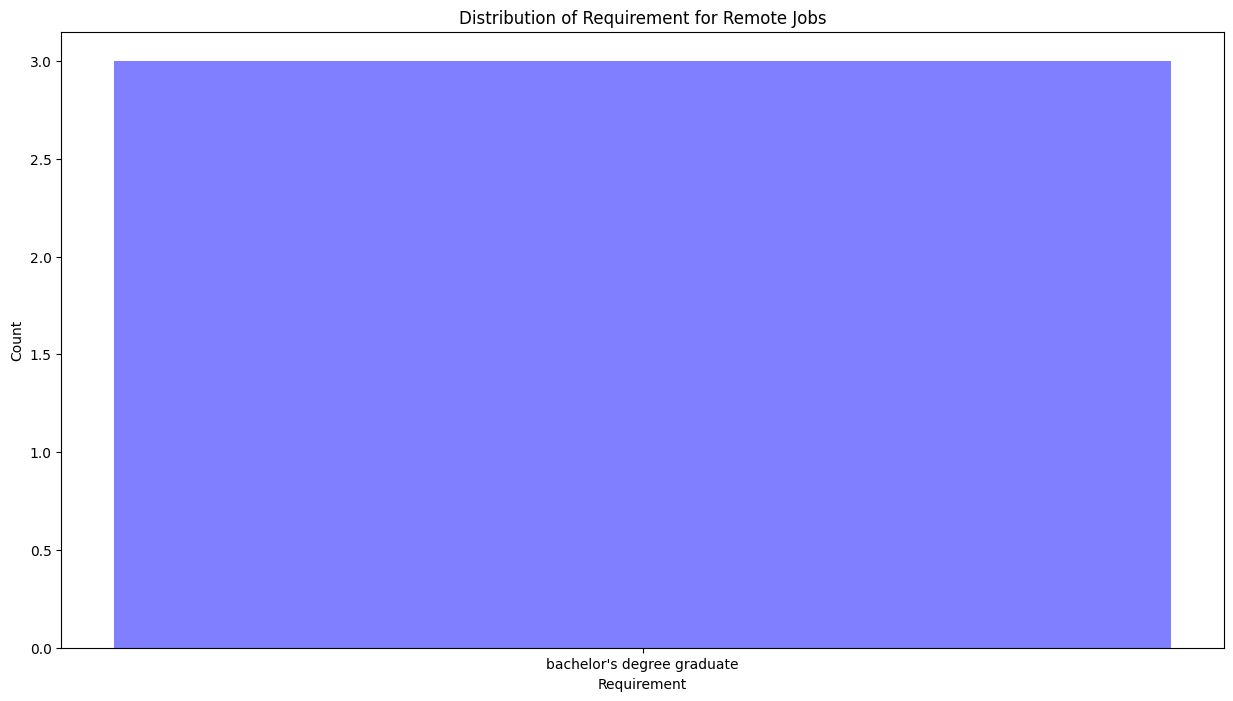

In [161]:
# Distribution requirement to find out remote jobs

# Plot distribution of values ​​by job type for remote jobs
plt.figure(figsize=(15, 8))
plt.bar(remote_jobs['requirement'].value_counts().index, remote_jobs['requirement'].value_counts(), color='blue', alpha=0.5)
plt.xticks(rotation=0) 
plt.xlabel('Requirement')
plt.ylabel('Count')
plt.title('Distribution of Requirement for Remote Jobs')
plt.show()

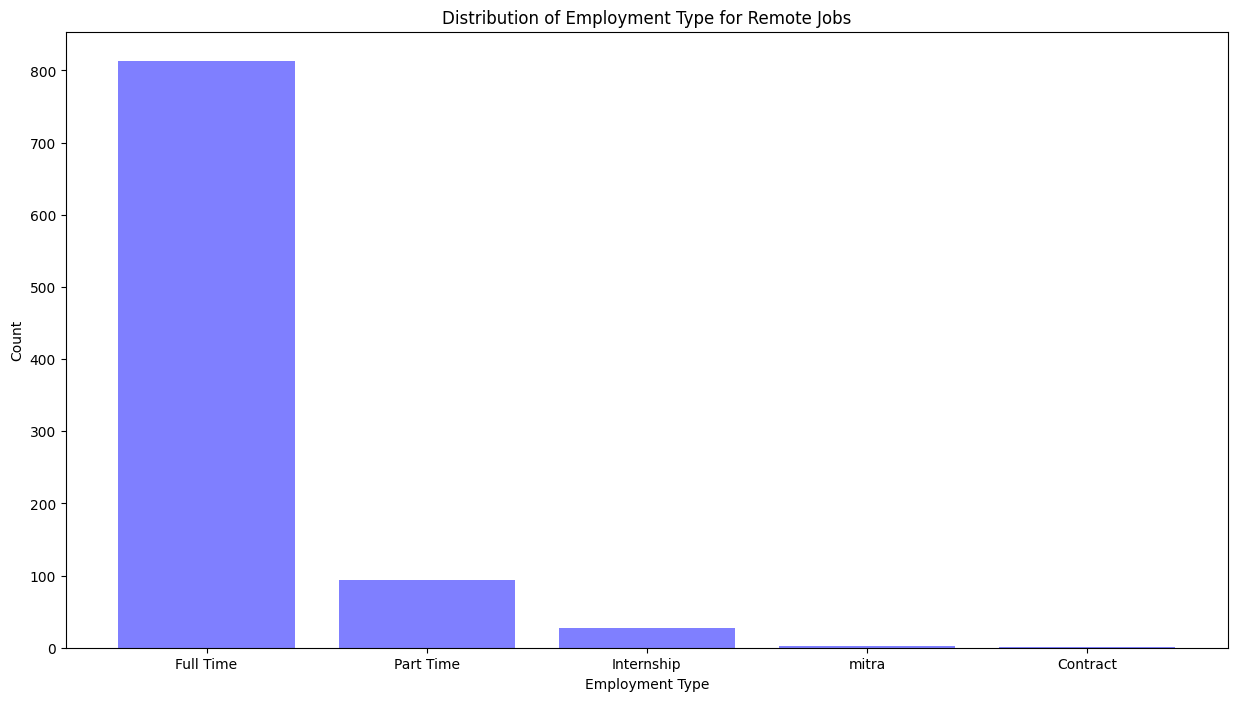

In [162]:
# Distribution type to find out remote jobs

# Plot distribution of values ​​by job type for remote jobs
plt.figure(figsize=(15, 8))
plt.bar(remote_jobs['type'].value_counts().index, remote_jobs['type'].value_counts(), color='blue', alpha=0.5)
plt.xticks(rotation=0) 
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Distribution of Employment Type for Remote Jobs')
plt.show()

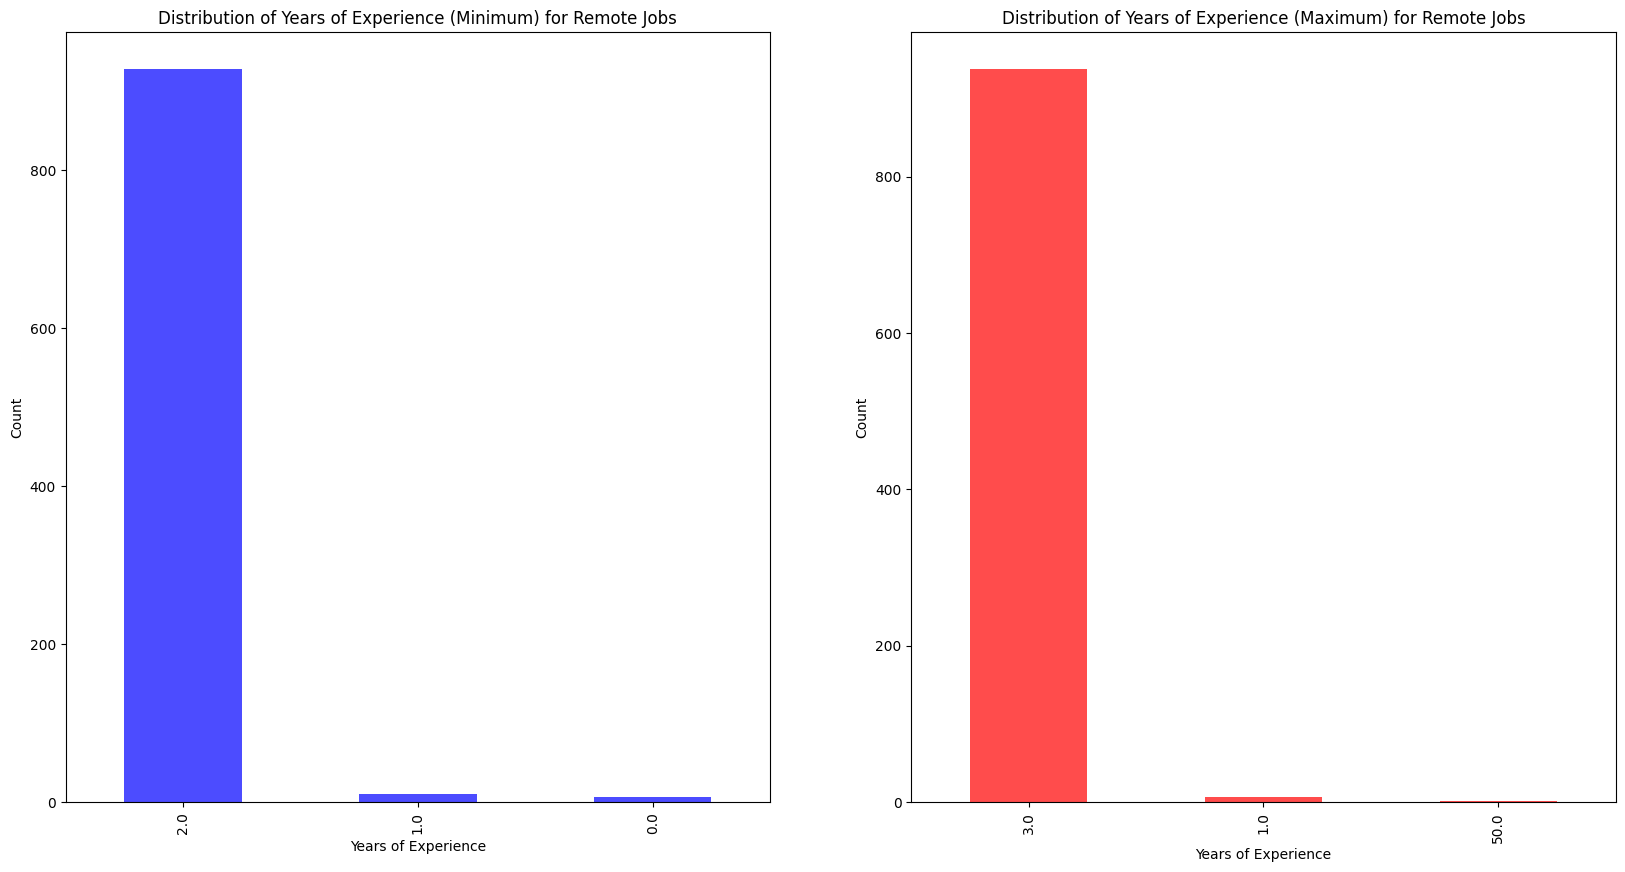

In [163]:
# Work year experience distribution

plt.figure(figsize=(20, 10))

# Plot year_experience_min
plt.subplot(1, 2, 1)
remote_jobs['year_experience_min'].value_counts().plot(kind='bar', color='blue', alpha=0.7, label='year_experience_min')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience (Minimum) for Remote Jobs')

# Plot year_experience_max
plt.subplot(1, 2, 2)
remote_jobs['year_experience_max'].value_counts().plot(kind='bar', color='red', alpha=0.7, label='year_experience_max')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience (Maximum) for Remote Jobs')

plt.show()


In [224]:
# Average Salary based on Experience level and location
average_salary = remote_jobs.groupby(["year_experience_min", "location"])["MYR"].mean().reset_index().sort_values(by='MYR', ascending=False)
average_salary

,year_experience_min,location,MYR
2,1.0,jakarta,10276.800
101,2.0,teluk gadong klang selangor malaysia 41200,2296.000
61,2.0,kampung johan setia klang selangor malaysia 4...,2296.000
88,2.0,"no. f-6-1, bay avenue, lorong bayan indah 1, q...",1640.000
6,2.0,"16, jalan molek 1/28, taman molek johor bahru ...",1640.000
...,...,...,...
96,2.0,"singapore, singapore",492.000
8,2.0,22--1 eco majestic semenyih selangor malaysia...,196.800
84,2.0,"magic cws block 3730, persiaran apec cyberjaya...",196.800
20,2.0,cheras kuala lumpur malaysia 56000,196.800


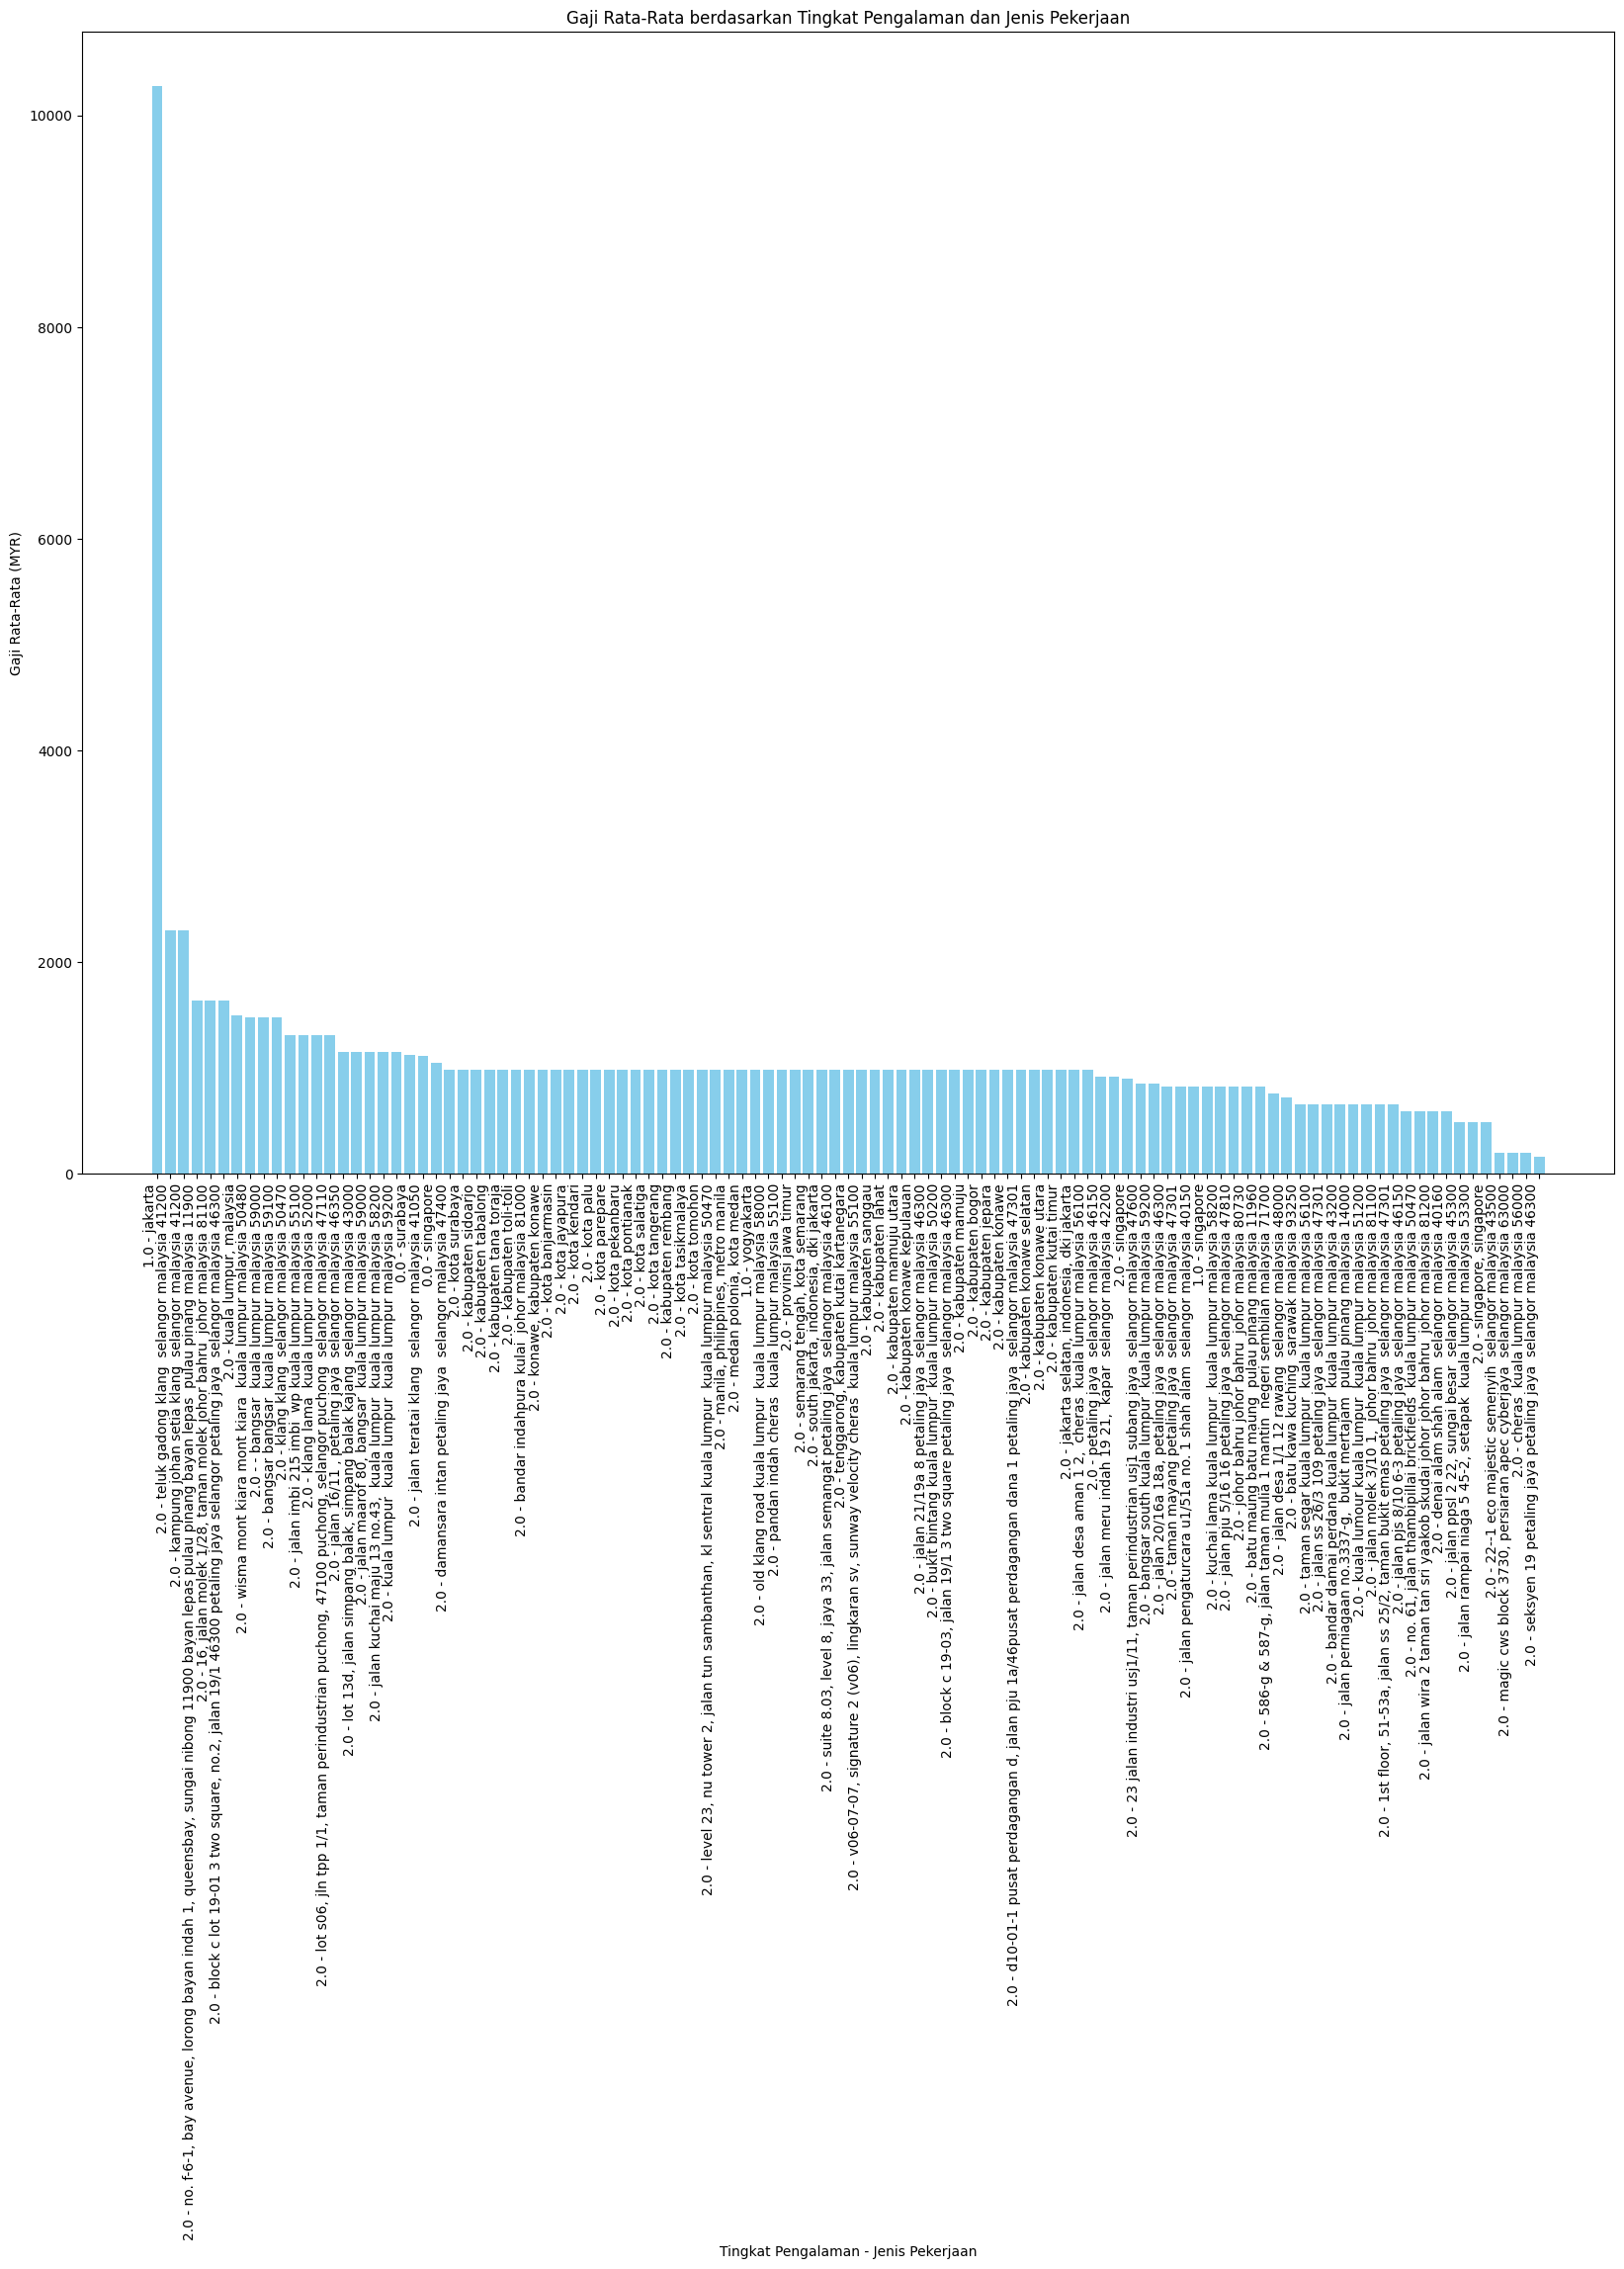

In [230]:
plt.figure(figsize=(20, 15))
plt.bar(range(len(average_salary)), average_salary['MYR'], color='skyblue')
plt.xticks(range(len(average_salary)), [f"{exp} - {loc}" for exp, loc in zip(average_salary['year_experience_min'], average_salary['location'])], rotation=90, ha="right")
plt.title('Gaji Rata-Rata berdasarkan Tingkat Pengalaman dan Jenis Pekerjaan')
plt.xlabel('Tingkat Pengalaman - Jenis Pekerjaan')
plt.ylabel('Gaji Rata-Rata (MYR)')
plt.show()


##### Encoding

In [164]:
df1.head()

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,year_experience_max,currency,salary_min,salary_max,remote,category,location,requirement,type,responsibility,MYR
0,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,2.0,3.0,SGD,3000.0,4000.0,NaN,arts/creative design,central,not specified,Full Time,Manage the arrangements for special events suc...,984.0
1,16,1,16.0,2022-03-29 08:59:56.687006,Digital Marketing Executive,2022-03-17 20:46:49.000000,Not Specified,2.0,3.0,SGD,3000.0,4000.0,NaN,arts/media/communications,central,not specified,Full Time,Manage the arrangements for special events suc...,984.0
50,159,2,161.0,2022-03-29 09:00:03.610569,Marketing Executive (KL),2022-03-23 19:30:53.000000,Junior Executive,2.0,3.0,MYR,3000.0,4000.0,NaN,marketing/business dev,selangor,bachelor's degree,Full Time,Must have SIM C/A (driving license),3000.0
51,159,2,161.0,2022-03-29 09:00:03.610569,Marketing Executive (KL),2022-03-23 19:30:53.000000,Junior Executive,2.0,3.0,MYR,3000.0,4000.0,NaN,marketing/business dev,selangor,post graduate diploma,Full Time,Must have SIM C/A (driving license),3000.0
52,159,2,161.0,2022-03-29 09:00:03.610569,Marketing Executive (KL),2022-03-23 19:30:53.000000,Junior Executive,2.0,3.0,MYR,3000.0,4000.0,NaN,marketing/business dev,selangor,professional degree,Full Time,Must have SIM C/A (driving license),3000.0


In [209]:
#Encoding

from sklearn.preprocessing import LabelEncoder
df2 = df1.copy()

label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['job_title', 'career_level', 'currency', 'remote', 'category', 'location', 'requirement', 'type', 'responsibility']

# Perform Label Encoding for each column
for column in columns_to_encode:
    df2[column] = label_encoder.fit_transform(df2[column])


df2

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,year_experience_max,currency,salary_min,salary_max,remote,category,location,requirement,type,responsibility,MYR
0,16,1,16.0,2022-03-29 08:59:56.687006,985,2022-03-17 20:46:49.000000,12,2.0,3.0,3,3000.0,4000.0,2,388,789,97,2,92,984.0
1,16,1,16.0,2022-03-29 08:59:56.687006,985,2022-03-17 20:46:49.000000,12,2.0,3.0,3,3000.0,4000.0,2,389,789,97,2,92,984.0
50,159,2,161.0,2022-03-29 09:00:03.610569,3647,2022-03-23 19:30:53.000000,6,2.0,3.0,1,3000.0,4000.0,2,1607,2671,16,2,104,3000.0
51,159,2,161.0,2022-03-29 09:00:03.610569,3647,2022-03-23 19:30:53.000000,6,2.0,3.0,1,3000.0,4000.0,2,1607,2671,102,2,104,3000.0
52,159,2,161.0,2022-03-29 09:00:03.610569,3647,2022-03-23 19:30:53.000000,6,2.0,3.0,1,3000.0,4000.0,2,1607,2671,108,2,104,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288261,4385526,4,101224.0,2023-12-16 00:00:13.738157,6327,2023-11-17 04:42:05.000000,27,2.0,3.0,0,4000000.0,6000000.0,2,1908,2899,136,2,160,1120.0
288262,4385734,4,355149.0,2023-12-16 00:00:13.738157,2839,2023-11-16 08:13:25.000000,27,2.0,3.0,4,3000.0,4000.0,2,1167,1053,136,2,160,984.0
288263,4385734,4,355149.0,2023-12-16 00:00:13.738157,2839,2023-11-16 08:13:25.000000,27,2.0,3.0,4,3000.0,4000.0,2,1175,1053,136,2,160,984.0
288264,4386010,4,494910.0,2023-12-16 00:00:13.738157,2839,2023-11-16 02:57:42.000000,27,2.0,3.0,4,3000.0,4000.0,2,1167,2070,136,2,160,984.0


In [210]:
# Delete 'date_scraped' and 'date_posted' Columns
df2.drop(['date_scraped', 'date_posted'], axis=1, inplace=True)

In [211]:
#Correlation between data
df2.corr(method='pearson')

,scrapedid,webid,companyid,job_title,career_level,year_experience_min,year_experience_max,currency,salary_min,salary_max,remote,category,location,requirement,type,responsibility,MYR
scrapedid,1.000000,0.087888,0.399401,0.085880,0.007748,0.017440,-0.001260,-0.067519,0.040768,0.044170,-0.176823,0.022336,-0.079301,-0.039358,-0.034638,0.078808,0.024211
webid,0.087888,1.000000,0.386750,0.003877,0.746770,-0.008894,-0.002789,-0.081369,0.007114,0.007496,-0.618593,-0.382059,-0.192586,0.359985,-0.008605,0.028183,-0.141044
companyid,0.399401,0.386750,1.000000,0.008798,0.262936,-0.027175,0.002951,-0.165284,0.068291,0.074735,-0.301787,-0.106526,-0.096572,0.109222,0.005214,0.046279,-0.016489
job_title,0.085880,0.003877,0.008798,1.000000,0.048380,0.166357,0.002032,0.011543,-0.025376,-0.025816,-0.022986,0.131362,-0.003413,0.005895,-0.014951,0.024449,0.043441
career_level,0.007748,0.746770,0.262936,0.048380,1.000000,0.133848,0.014267,-0.006554,0.065988,0.065612,-0.520619,-0.351403,-0.151338,0.498625,0.029782,0.030731,-0.252797
year_experience_min,0.017440,-0.008894,-0.027175,0.166357,0.133848,1.000000,-0.007404,0.052067,-0.005465,-0.002428,0.000883,0.015566,-0.031674,0.017198,0.002129,0.008894,0.090126
year_experience_max,-0.001260,-0.002789,0.002951,0.002032,0.014267,-0.007404,1.000000,0.003234,0.008189,0.005493,-0.024464,-0.000869,0.000604,0.008368,-0.000092,-0.017034,-0.003027
currency,-0.067519,-0.081369,-0.165284,0.011543,-0.006554,0.052067,0.003234,1.000000,-0.223876,-0.228435,-0.055905,-0.041590,-0.009271,0.134745,0.032101,-0.043227,-0.407847
salary_min,0.040768,0.007114,0.068291,-0.025376,0.065988,-0.005465,0.008189,-0.223876,1.000000,0.976798,0.027346,0.040932,-0.052983,-0.058428,-0.019586,0.007358,0.029890
salary_max,0.044170,0.007496,0.074735,-0.025816,0.065612,-0.002428,0.005493,-0.228435,0.976798,1.000000,0.029190,0.042619,-0.055153,-0.059979,-0.018192,0.007531,0.021519


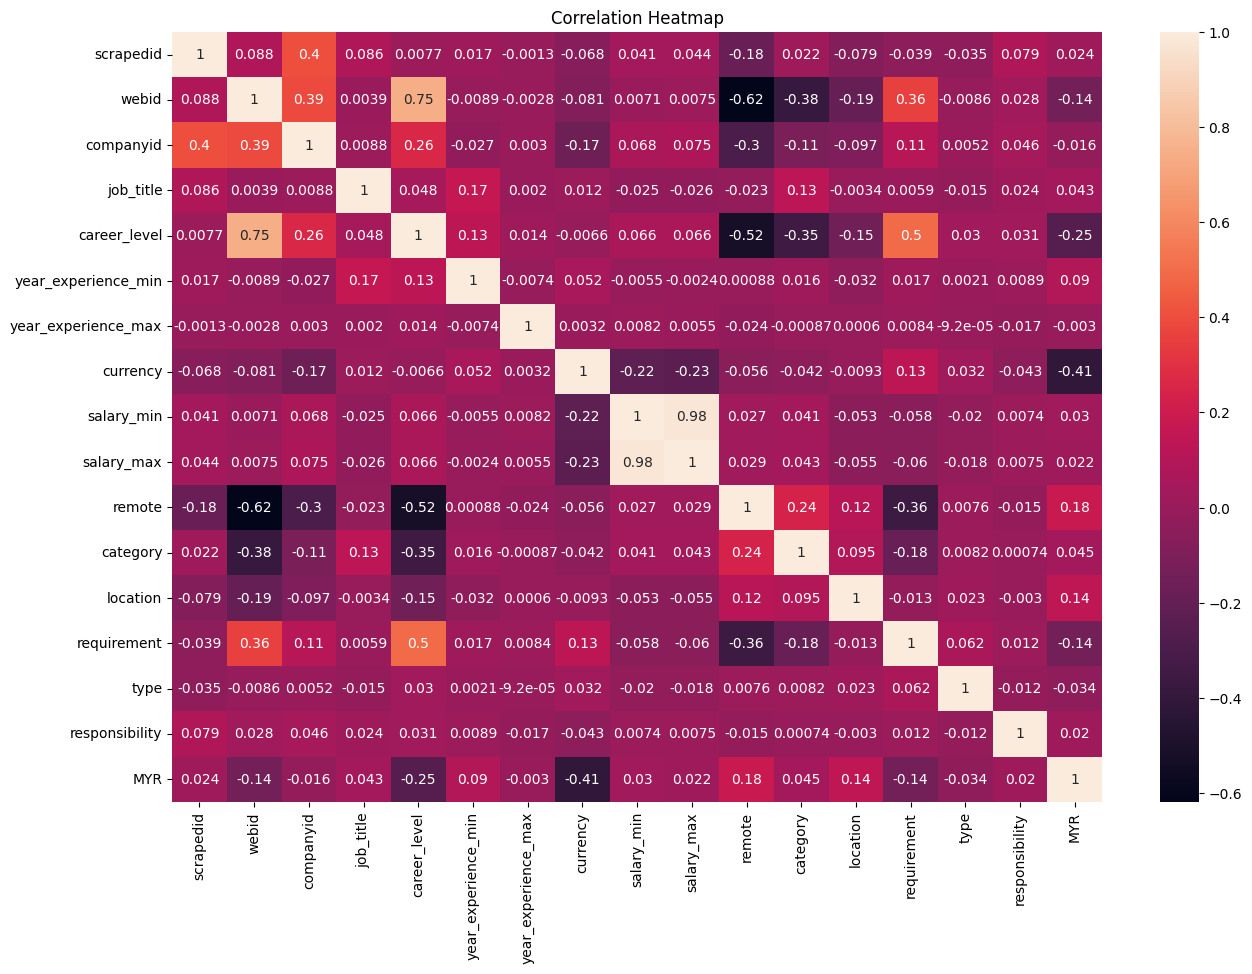

In [212]:
# Checking relationship between Features and Response
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Modelling

In this model I will use some machine learning, including, **Linear regression**: This model can be used to predict salaries based on factors such as experience, education level, location, and job responsibilities. This can help you find a fair salary range for a particular job position, and after that **Cluster Analysis**: this can group job positions based on similarity of responsibilities and duties, so you can identify possible tasks that can be turned into gig work

##### Linear Regression

In [213]:
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Feature Selection
X = df2.drop(columns=['salary_min'])

# Target Variable
y = df2['salary_min']

# Train-Test Split
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1, random_state=0)

# Model Training
modell = LinearRegression()
modell.fit(X_train, y_train)

LinearRegression()

In [214]:
#check the shape of the training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(166460, 16)
(166460,)
(18496, 16)
(18496,)


In [215]:
print('intercept=', modell.intercept_)
print('slope=', modell.coef_)

intercept= 9851.194297726455
slope= [ 5.73993006e-04 -1.18494419e+03 -3.00647677e-02 -5.57304344e-01
  1.52837881e+03 -5.08966142e+03  5.87630894e+03 -7.05739360e+03
  6.64597586e-01  6.53534196e+02  3.29915472e+00 -1.40262653e+00
 -9.35145230e+01 -2.69561004e+03 -1.07321633e+01  2.29584348e-01]


In [216]:
coef_dict = {
    'features': X.columns,
    'coef_values': modell.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_values'])
coef

,features,coef_values
0,scrapedid,0.000574
1,webid,-1184.944191
2,companyid,-0.030065
3,job_title,-0.557304
4,career_level,1528.378812
5,year_experience_min,-5089.661421
6,year_experience_max,5876.308939
7,currency,-7057.393599
8,salary_max,0.664598
9,remote,653.534196


##### Feature Selection using Adjusted R2 Squared

In [217]:
#Measure performance using Adjusted R-squared

from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.9289456936487992


Our model gets an accuracy score of **93%**, meaning our model is successful in selecting the optimal feature subset

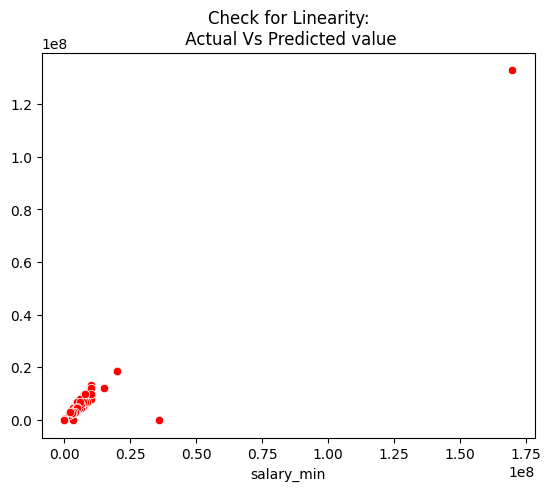

In [218]:
# Visualize linearity between actual and predicted values
f = plt.figure(figsize=(14, 5))

# Scatterplot
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
plt.show()

### Conclusion

Based on the analysis, our conclusions are:

1. Marketing Executive and Digital Marketing Executive are suitable candidates for gig jobs within the Marketing and Advertising category.
2. The prerequisite for these roles is a Bachelor's degree.
3. Although initially full-time, there's potential to transition these roles into flexible gig work.
4. The average expected experience for these roles is 2-3 years.

    Thus, converting positions into gig work can meet market demand while providing flexibility for experienced professionals.
Experience is the main determinant in determining a person's salary, thus showing a strong relationship between professional background and compensation level.